In [1]:
import cv2

# Open the video file
video_path = r"C:\Users\goura\OneDrive\Desktop\MAT\DJI_0033.MP4"  # Update with your video file path
cap = cv2.VideoCapture(video_path)

# Check if the video was successfully opened
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Get the frames per second (FPS) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(f"Frames per second (FPS): {fps}")

    # Define the time interval (in seconds) between the two frames
    time_interval = 0.0667  # Example: 0.5 seconds

    # Calculate the frame difference based on the time interval and FPS
    frame_difference = int(time_interval * fps)
    print(f"Frame difference: {frame_difference}")

    # Read the first frame at the start of the video
    ret, frame1 = cap.read()
    if not ret:
        print("Error: Could not read the first frame.")
    else:
        # Save the first frame
        cv2.imwrite(r"C:\Users\goura\OneDrive\Desktop\MAT\EXTRACTED\frame_0001.jpg", frame1)
        print("First frame saved.")

        # Set the video position to the frame difference
        current_frame_position = cap.set(cv2.CAP_PROP_POS_FRAMES, frame_difference)
        print(f"Current frame position: {current_frame_position}")

        # Read the second frame at the calculated frame difference
        ret, frame2 = cap.read()
        if not ret:
            print("Error: Could not read the second frame.")
        else:
            # Save the second frame
            cv2.imwrite(r"C:\Users\goura\OneDrive\Desktop\MAT\EXTRACTED\frame_0002.jpg", frame2)
            print("Second frame saved.")

    # Release the video capture object
    cap.release()


Frames per second (FPS): 29.97002997002997
Frame difference: 1
First frame saved.
Current frame position: True
Second frame saved.


In [2]:
import cv2
import os

# Define the paths to the images
frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\EXTRACTED\frame_0001.jpg"
frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\EXTRACTED\frame_0002.jpg"
# Load the frames
frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

# Convert the frames to grayscale
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection with thresholds
edge1 = cv2.Canny(frame1_gray, 100, 200)
edge2 = cv2.Canny(frame2_gray, 100, 200)

# Find contours in the edge-detected images
contours1, _ = cv2.findContours(edge1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(edge2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create copies of the original frames to draw contours
frame1_with_contours = frame1.copy()
frame2_with_contours = frame2.copy()

# Draw contours on the copies of the original frames
cv2.drawContours(frame1_with_contours, contours1, -1, (0, 255, 0), 2)
cv2.drawContours(frame2_with_contours, contours2, -1, (0, 255, 0), 2)

# Define the paths to save the processed frames
processed_frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Contours\contours_first_frame1.jpg"
processed_frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Contours\contours_second_frame2.jpg"

# Save the processed frames
cv2.imwrite(processed_frame1_path, frame1_with_contours)
cv2.imwrite(processed_frame2_path, frame2_with_contours)

print("Frames processed with edge detection and contour detection, and saved.")


Frames processed with edge detection and contour detection, and saved.


Text(0.5, 1.0, 'Second Frame')

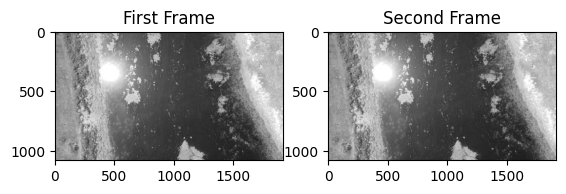

In [3]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Paths to the images
frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\EXTRACTED\frame_0001.jpg"
frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\EXTRACTED\frame_0002.jpg"

# Load images
frame1 = cv2.imread(frame1_path, cv2.IMREAD_GRAYSCALE)
frame2 = cv2.imread(frame2_path, cv2.IMREAD_GRAYSCALE)

# Perform cross-correlation
cross_corr = cv2.matchTemplate(frame1, frame2, cv2.TM_CCORR_NORMED)

# Apply Gaussian filter
filtered_corr = gaussian_filter(cross_corr, sigma=1)

# Plot the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(frame1, cmap='gray')
plt.title('First Frame')

plt.subplot(1, 3, 2)
plt.imshow(frame2, cmap='gray')
plt.title('Second Frame')

# plt.subplot(1, 3, 3)
# plt.imshow(filtered_corr, cmap='viridis')
# plt.title('Filtered Cross-correlation')
# plt.colorbar()

# plt.tight_layout()
# plt.show()


In [4]:
import cv2
import numpy as np

# Define the paths to the images
frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Contours\contours_first_frame1.jpg"
frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Contours\contours_second_frame2.jpg"
# Load the frames
frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

# Verify that the frames are loaded correctly
if frame1 is None or frame2 is None:
    print("Error loading frames.")
else:
    # Function to apply CLAHE to an image
    def apply_clahe(frame):
        # Convert the frame to grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Create a CLAHE object with specified parameters
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

        # Apply CLAHE to the grayscale image
        clahe_frame = clahe.apply(frame_gray)

        return clahe_frame

    # Apply CLAHE to both frames
    clahe_frame1 = apply_clahe(frame1)
    clahe_frame2 = apply_clahe(frame2)

    # Define the paths to save the CLAHE-enhanced frames
    clahe_frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Clahe\Clahe_1.jpg"
    clahe_frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Clahe\Clahe_2.jpg"
    # Save the CLAHE-enhanced frames
    cv2.imwrite(clahe_frame1_path, clahe_frame1)
    cv2.imwrite(clahe_frame2_path, clahe_frame2)

    print("CLAHE applied to both frames and saved.")


CLAHE applied to both frames and saved.


In [5]:
import cv2
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# Define the paths to the images
frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Clahe\Clahe_1.jpg"
frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Clahe\Clahe_2.jpg"
# Load the frames
frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

# Verify that frames are loaded correctly
if frame1 is None or frame2 is None:
    print("Error: Could not load one or both frames. Please check the file paths.")
else:
    # Convert the frames to grayscale
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to the grayscale frames
    frame1_eq = cv2.equalizeHist(frame1_gray)
    frame2_eq = cv2.equalizeHist(frame2_gray)

    # Define paths for saving the enhanced frames
    enhanced_frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Enhanced\enhanced_first_frame1.jpg"
    enhanced_frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Enhanced\enhanced_second_frame2.jpg"

    # Save the enhanced frames
    cv2.imwrite(enhanced_frame1_path, frame1_eq)
    cv2.imwrite(enhanced_frame2_path, frame2_eq)

    print("Histogram equalization applied and frames saved.")
    


Histogram equalization applied and frames saved.


In [6]:
import cv2
import numpy as np

# Define the paths to the images
frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Enhanced\enhanced_first_frame1.jpg"
frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Enhanced\enhanced_second_frame2.jpg"
# Load the frames
frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

# Verify that frames are loaded correctly
if frame1 is None or frame2 is None:
    print("Error: Could not load one or both frames. Please check the file paths.")
else:
    # Function to apply a high-pass filter to an image
    def apply_high_pass_filter(frame, kernel_size=15):
        # Convert the frame to grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply a Gaussian blur (low-pass filter) with the specified kernel size
        blurred_frame = cv2.GaussianBlur(frame_gray, (kernel_size, kernel_size), 0)

        # Subtract the blurred frame from the original grayscale frame to get the high-pass frame
        high_pass_frame = frame_gray - blurred_frame

        # Normalize the high-pass frame to the range [0, 255]
        high_pass_frame_normalized = cv2.normalize(high_pass_frame, None, 0, 255, cv2.NORM_MINMAX)

        # Return the high-pass frame (either grayscale or converted to BGR as needed)
        # Depending on your application, you may not need to convert it back to BGR
        # return cv2.cvtColor(high_pass_frame_normalized.astype(np.uint8), cv2.COLOR_GRAY2BGR)
        return high_pass_frame_normalized.astype(np.uint8)

    # Apply the high-pass filter to both frames
    high_pass_frame1 = apply_high_pass_filter(frame1, kernel_size=15)
    high_pass_frame2 = apply_high_pass_filter(frame2, kernel_size=15)

    # Define paths to save the high-pass frames
    high_pass_frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\High Pass\high_pass_first_frame1.jpg"
    high_pass_frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\High Pass\high_pass_second_frame2.jpg"
    # Save the high-pass frames
    cv2.imwrite(high_pass_frame1_path, high_pass_frame1)
    cv2.imwrite(high_pass_frame2_path, high_pass_frame2)

    print("High-pass filter applied to both frames and saved.")


High-pass filter applied to both frames and saved.


In [7]:
import cv2
import numpy as np

# Function to apply auto contrast stretching and subtract mean intensity to an image
def auto_contrast_stretch_and_subtract_mean(frame):
    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Auto contrast stretching (normalization)
    min_val = np.min(frame_gray)
    max_val = np.max(frame_gray)

    # Avoid division by zero error
    if max_val - min_val == 0:
        normalized_frame = np.zeros_like(frame_gray, dtype=np.uint8)
    else:
        # Normalize the grayscale image to the range [0, 255]
        normalized_frame = (frame_gray - min_val) / (max_val - min_val) * 255
        normalized_frame = normalized_frame.astype(np.uint8)

    # Calculate the mean intensity of the normalized frame
    mean_intensity = np.mean(normalized_frame)

    # Subtract the mean intensity from the normalized frame
    frame_subtracted = normalized_frame - mean_intensity

    # Normalize the frame after subtracting mean to ensure the pixel values are in the range of 0-255
    frame_subtracted_normalized = cv2.normalize(frame_subtracted, None, 0, 255, cv2.NORM_MINMAX)

    # Convert the frame back to BGR color space
    frame_bgr = cv2.cvtColor(frame_subtracted_normalized.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    return frame_bgr

# Apply auto contrast stretching and subtract mean intensity to both frames
processed_frame1 = auto_contrast_stretch_and_subtract_mean(frame1)
processed_frame2 = auto_contrast_stretch_and_subtract_mean(frame2)

# Save the enhanced frames back to the folder
cv2.imwrite(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_first_frame1.jpg", processed_frame1)
cv2.imwrite(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_second_frame2.jpg", processed_frame2)

print("Auto contrast stretching and subtraction of mean intensity applied to both frames and saved.")


Auto contrast stretching and subtraction of mean intensity applied to both frames and saved.


In [49]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # File paths for the two frames
# frame1_path = '/content/drive/MyDrive/myexplo/images/processed_first_frame.jpg'
# frame2_path = '/content/drive/MyDrive/myexplo/images/processed_second_frame.jpg'

# # Read the frames from the file paths
# frame1 = cv2.imread(frame1_path)
# frame2 = cv2.imread(frame2_path)

# # Check if frames were read correctly
# if frame1 is None or frame2 is None:
#     print("Error loading frames.")
#     exit()

# # Convert frames to grayscale
# frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
# frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# # Calculate optical flow using Farneback's method
# flow = cv2.calcOpticalFlowFarneback(frame1_gray, frame2_gray, None,
#                                     pyr_scale=0.5, levels=3, winsize=15,
#                                     iterations=3, poly_n=5, poly_sigma=1.2, flags=0)

# # Calculate the magnitude and angle of the flow
# magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# # Normalize the magnitude for better visualization
# normalized_magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
# 
# # Convert normalized magnitude to uint8 for visualization
# normalized_magnitude = normalized_magnitude.astype(np.uint8)

# # Create a heatmap using the normalized magnitude
# plt.figure(figsize=(10, 6))
# plt.title("Heatmap of Velocity")
# heatmap = plt.imshow(normalized_magnitude, cmap='hot')
# plt.colorbar(heatmap)
# plt.show()


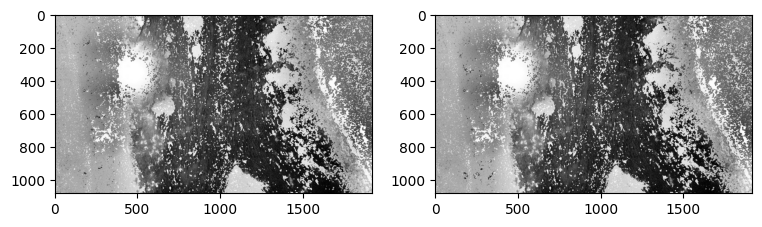

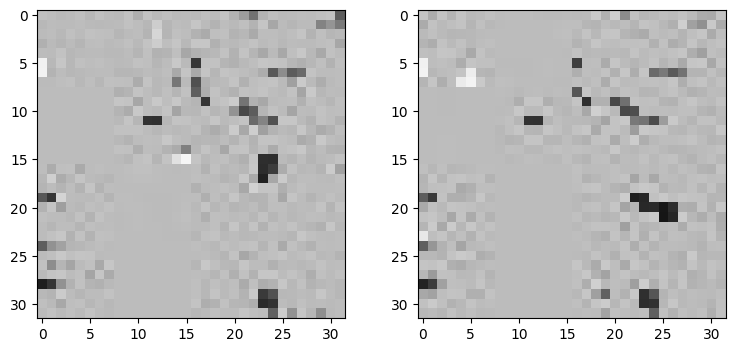

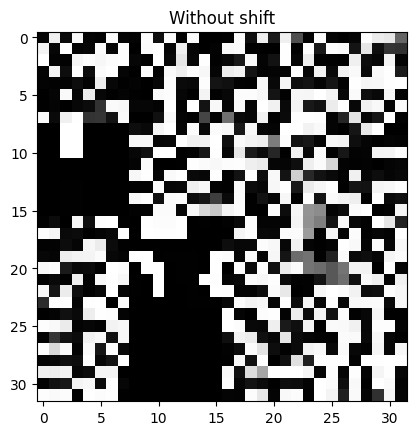

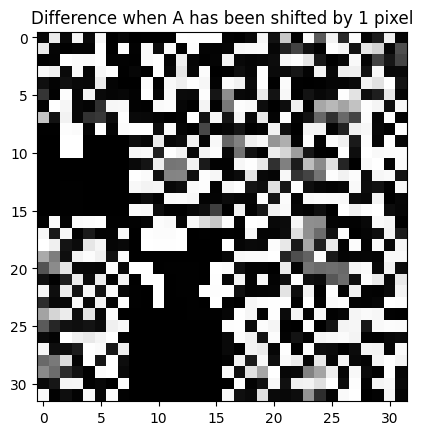

best_dist=375.1159820642144
best_shift=(0, 0)


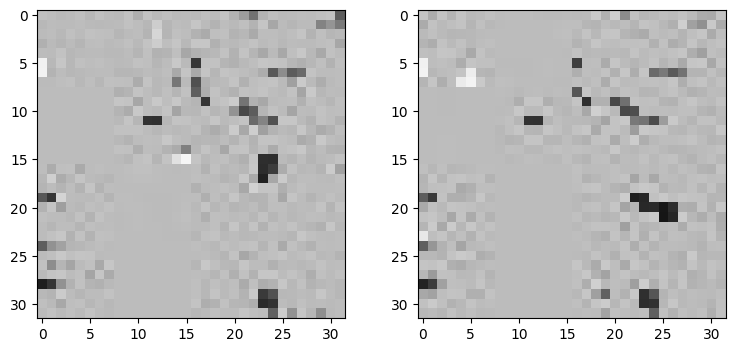

Size of the correlation map: (63, 63, 5)
X.shape: (63, 63)
Y.shape: (63, 63)
cross_corr.shape: (63, 63, 5)


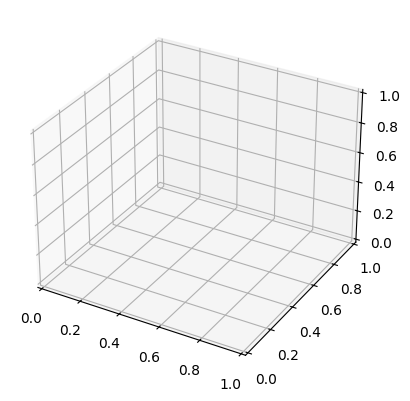

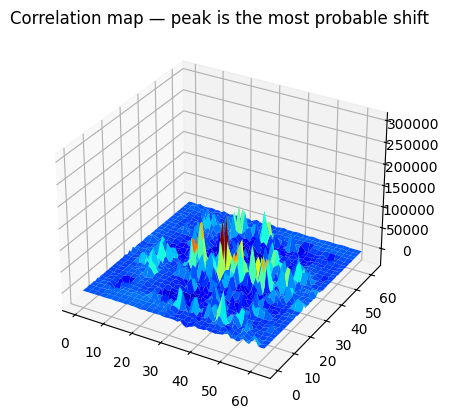

y=31, x=31


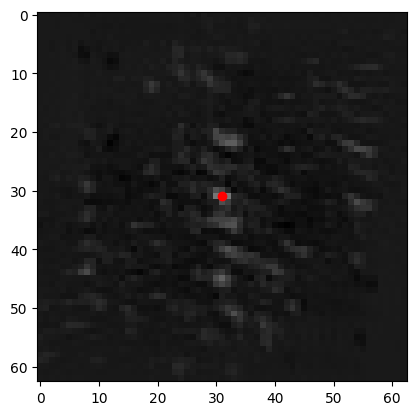

dy=0, dx=0


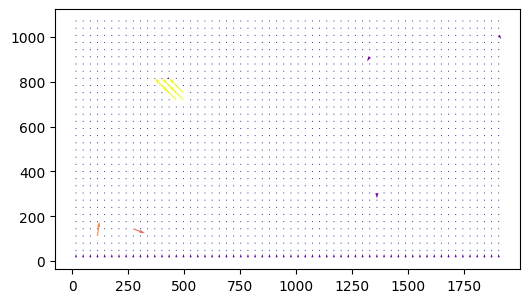

int_win_size=array([32, 32])
search_win_size=array([64, 64])
max velocity that can be detected with these window sizes: [16 16]


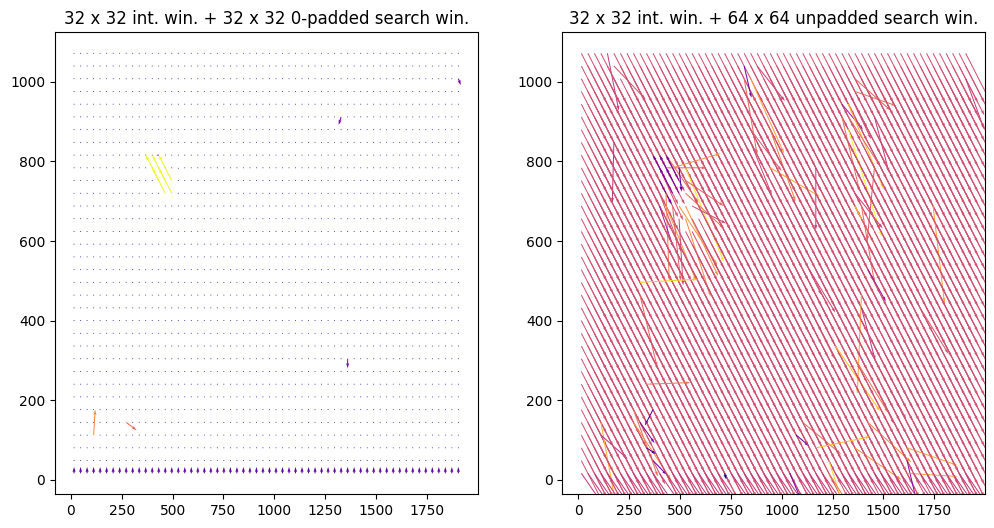

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import correlate
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt


def match_template(img, template, maxroll=8):
    best_dist = np.inf
    best_shift = (-1, -1)
    for y in range(maxroll):
        for x in range(maxroll):
            # calculate Euclidean distance
            dist = np.sqrt(
                np.sum((img - np.roll(template, (y, x), axis=(0, 1))) ** 2))
            if dist < best_dist:
                best_dist = dist
                best_shift = (y, x)
    return (best_dist, best_shift)


def vel_field(curr_frame, next_frame, win_size):
    ys = np.arange(0, curr_frame.shape[0], win_size)
    xs = np.arange(0, curr_frame.shape[1], win_size)
    dys = np.zeros((len(ys), len(xs)))
    dxs = np.zeros((len(ys), len(xs)))

    # Iterate through the sub-windows in the current frame
    for iy, y in enumerate(ys):
        for ix, x in enumerate(xs):
            # Extract the interrogation window from the current frame
            int_win = curr_frame[y: y + win_size, x: x + win_size]
            # Extract the search window from the next frame
            search_win = next_frame[y: y + win_size, x: x + win_size]

            # Calculate the cross-correlation using method 'fft'
            cross_corr = correlate(
                search_win - search_win.mean(), int_win - int_win.mean(), method="fft", mode='same'
            )

            # Find the maximum value in the cross-correlation map
            max_index = np.unravel_index(np.argmax(cross_corr), cross_corr.shape)

            # Calculate the displacement using the maximum index
            dy = max_index[0] - win_size // 2
            dx = max_index[1] - win_size // 2

            # Store the displacement in the corresponding arrays
            dys[iy, ix] = dy
            dxs[iy, ix] = dx

    return xs + win_size / 2, ys + win_size / 2, dxs, dys
def vel_field_asymmetric_wins(curr_frame, next_frame, half_int_win_size, half_search_win_size):
    ys = np.arange(
        half_int_win_size[0], curr_frame.shape[0], 2 * half_int_win_size[0])
    xs = np.arange(
        half_int_win_size[1], curr_frame.shape[1], 2 * half_int_win_size[1])
    dys = np.zeros((len(ys), len(xs)))
    dxs = np.zeros((len(ys), len(xs)))

    for iy, y in enumerate(ys):
        for ix, x in enumerate(xs):
            int_win = curr_frame[
                y - half_int_win_size[0]: y + half_int_win_size[0],
                x - half_int_win_size[1]: x + half_int_win_size[1]
            ]

            # Define the search window boundaries
            search_win_y_min = y - half_search_win_size[0]
            search_win_y_max = y + half_search_win_size[0]
            search_win_x_min = x - half_search_win_size[1]
            search_win_x_max = x + half_search_win_size[1]

            # Define the truncated search window in the next frame
            truncated_search_win = next_frame[
                max(0, search_win_y_min): min(next_frame.shape[0], search_win_y_max),
                max(0, search_win_x_min): min(next_frame.shape[1], search_win_x_max)
            ]

            # Calculate cross-correlation
            cross_corr = correlate(
                truncated_search_win - truncated_search_win.mean(),
                int_win - int_win.mean(),
                method='fft'
            )

            # Calculate the maximum index in cross-correlation
            max_index = np.unravel_index(np.argmax(cross_corr), cross_corr.shape)
            dy = max_index[0] - half_int_win_size[0]
            dx = max_index[1] - half_int_win_size[1]

            # Adjust for truncation
            if search_win_y_min < 0:
                dy += -search_win_y_min
            if search_win_x_min < 0:
                dx += -search_win_x_min

            # Store the displacements
            dys[iy, ix] = dy
            dxs[iy, ix] = dx

    # Return the coordinates and displacements
    return xs, ys, dxs, dys



# import the standard numerical and plotting packages

# load the images
a = imread(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_first_frame1.jpg")
b = imread(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_second_frame2.jpg")

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(a, cmap=plt.cm.gray)
axs[1].imshow(b, cmap=plt.cm.gray)
plt.show()

win_size = 32

a_win = a[:win_size, :win_size].copy()
b_win = b[:win_size, :win_size].copy()

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(a_win, cmap=plt.cm.gray)
axs[1].imshow(b_win, cmap=plt.cm.gray)
plt.show()

fig = plt.imshow(b_win - a_win, cmap=plt.cm.gray)
plt.title("Without shift")
plt.show()

plt.imshow(b_win - np.roll(a_win, (1, 0), axis=(0, 1)), cmap=plt.cm.gray)
plt.title("Difference when A has been shifted by 1 pixel")
plt.show()

# let's test that it works by manually rolling (shifting circurlarly) the same
# image
match_template(np.roll(a_win, (2, 0), axis=(0, 1)), a_win)

# indeed, when we find the correct shift, we got zero distance. it's not so in real images:
best_dist, best_shift = match_template(b_win, a_win)
print(f"{best_dist=}")
print(f"{best_shift=}")

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(np.roll(a_win, best_shift, axis=(0, 1)), cmap='gray')
axs[1].imshow(b_win, cmap='gray')
plt.show()


cross_corr = correlate(b_win - b_win.mean(), a_win -
                       a_win.mean(), method="fft")
# Note that it's approximately twice as large than the original windows, as we
# can shift a_win by a maximum of it's size - 1 horizontally and vertically
# while still maintaining some overlap between the two windows.
print("Size of the correlation map: %s" % (cross_corr.shape,))

# let's see what the cross-correlation looks like

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
Y, X = np.meshgrid(
    np.arange(cross_corr.shape[0]), np.arange(cross_corr.shape[1]))

Y, X = np.meshgrid(np.arange(cross_corr.shape[0]), np.arange(cross_corr.shape[1]))

# Verify the shapes of X, Y, and cross_corr
print(f"X.shape: {X.shape}")
print(f"Y.shape: {Y.shape}")
print(f"cross_corr.shape: {cross_corr.shape}")

# # Ensure X, Y, and cross_corr have the same shape
# assert X.shape == cross_corr.shape and Y.shape == cross_corr.shape, "Shape mismatch between X, Y, and cross_corr"
# Choose a slice from the 3rd dimension of cross_corr
# For example, to use the first slice:
cross_corr_2d = cross_corr[:, :, 0]

# Plot the surface using the chosen slice
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, cross_corr_2d, cmap='jet', linewidth=0.2)
plt.title("Correlation map — peak is the most probable shift")
plt.show()




# Choose the first slice from the 3rd dimension of cross_corr
cross_corr_2d = cross_corr[:, :, 0]  # You can change 0 to another index to select a different slice

# Display the chosen 2-dimensional slice of cross_corr
plt.imshow(cross_corr_2d, cmap=plt.cm.gray)

# Find the peak (y, x) coordinates in the correlation map
y, x = np.unravel_index(cross_corr_2d.argmax(), cross_corr_2d.shape)
print(f"{y=}, {x=}")

plt.plot(x, y, "ro")  # Mark the peak with a red dot
plt.show()

# Calculate dy and dx using the peak coordinates and window size (32)
dy, dx = y - 31, x - 31
print(f"{dy=}, {dx=}")

# Calculate velocity field
xs, ys, dxs, dys = vel_field(a, b, 32)
norm_drs = np.sqrt(dxs ** 2 + dys ** 2)

# Plot the velocity field
fig, ax = plt.subplots(figsize=(6, 6))

# we need these flips on y since quiver uses a bottom-left origin, while our
# arrays use a top-right origin
ax.quiver(
    xs,
    ys[::-1],
    dxs,
    -dys,
    norm_drs,
    cmap="plasma",
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
ax.set_aspect("equal")
plt.show()

int_win_size = np.array([32, 32])
print(f"{int_win_size=}")

# Calculate the dimensions to crop
new_height = a.shape[0] - (a.shape[0] % int_win_size[0])
new_width = a.shape[1] - (a.shape[1] % int_win_size[1])

# Crop the image
a_cropped = a[:new_height, :new_width, :]

# Now a_cropped has dimensions divisible by int_win_size

# Assertion checks
assert np.all(np.array(a_cropped.shape[:2]) % int_win_size == 0), "a_cropped shape must be divisible by int_win_size"
assert np.all(int_win_size % 2 == 0), "int_win_size must be even"

# Calculate half of int_win_size
half_int_win_size = int_win_size // 2


search_win_size = int_win_size * 2
print(f"{search_win_size=}")
assert np.all(search_win_size % 2 == 0)
half_search_win_size = search_win_size // 2
assert np.all(search_win_size > int_win_size)
print(
    "max velocity that can be detected with these window sizes: "
    + f"{half_search_win_size - half_int_win_size}"
)

xs_asym, ys_asym, dxs_asym, dys_asym = vel_field_asymmetric_wins(
    a, b, half_int_win_size, half_search_win_size
)
norm_drs_asym = np.sqrt(dxs_asym ** 2 + dys_asym ** 2)

xs_asym, ys_asym, dxs_asym, dys_asym = vel_field_asymmetric_wins(
    a, b, half_int_win_size, half_search_win_size
)
norm_drs_asym = np.sqrt(dxs_asym ** 2 + dys_asym ** 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].quiver(
    xs,
    ys[::-1],
    dxs,
    -dys,
    norm_drs,
    cmap="plasma",
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
axs[1].quiver(
    xs_asym,
    ys_asym[::-1],
    dxs_asym,
    -dys_asym,
    norm_drs_asym,
    cmap="plasma",
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
axs[0].set_title(
    f"{win_size} x {win_size} int. win. + "
    f"{win_size} x {win_size} 0-padded search win."
)
axs[1].set_title(
    f"{int_win_size[0]} x {int_win_size[1]} int. win. + "
    f"{search_win_size[0]} x {search_win_size[0]} unpadded search win."
)
ax.set_aspect("equal")
plt.show()



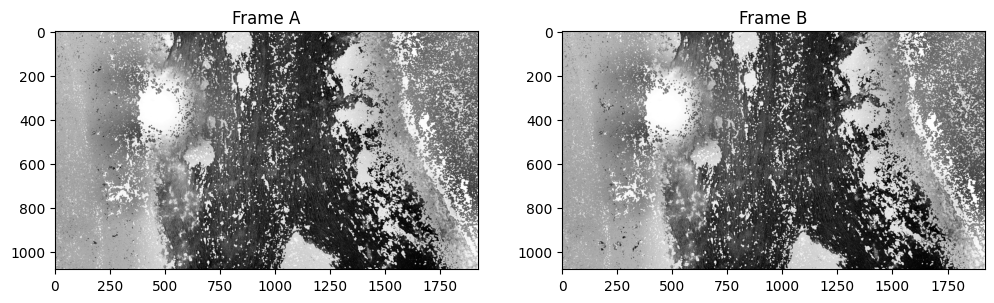

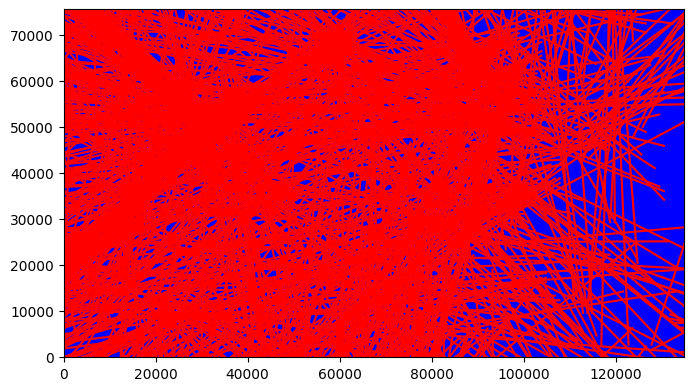

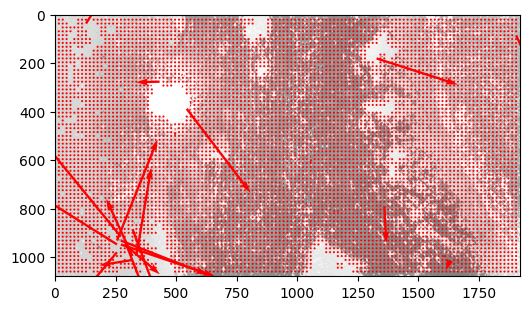

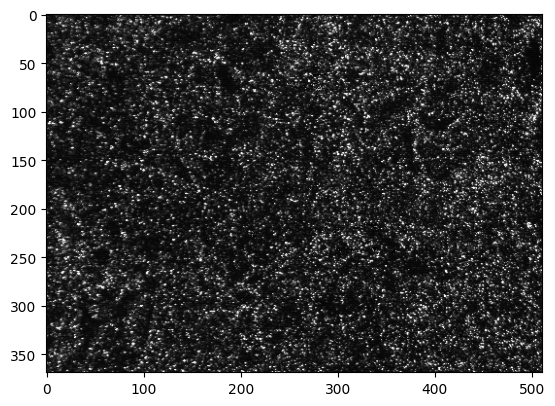

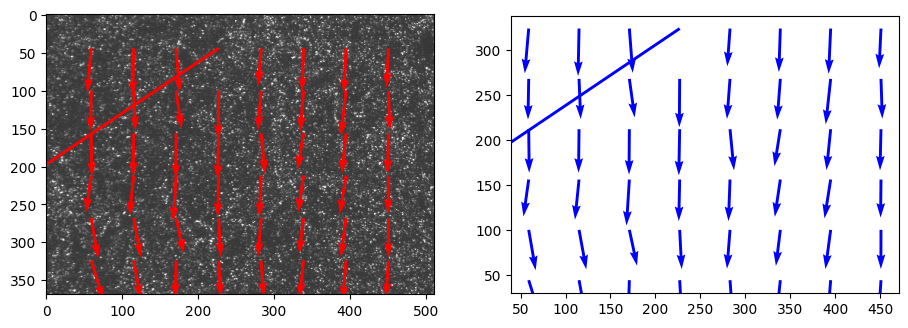

C:\Users\goura\anaconda3\envs\TF2\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [9]:
!pip install openpiv
from openpiv import tools, pyprocess, validation, filters, scaling
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Read images
frame_a = tools.imread(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_first_frame1.jpg")
frame_b = tools.imread(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_second_frame2.jpg")

# Plotting frames
fig, ax = plt.subplots(1, 2, figsize=(12, 10))
ax[0].imshow(frame_a, cmap=plt.cm.gray)
ax[0].set_title('Frame A')
ax[1].imshow(frame_b, cmap=plt.cm.gray)
ax[1].set_title('Frame B')

# Parameters
winsize = 32  # pixels, interrogation window size in frame A
searchsize = 38  # pixels, search in image B
overlap = 24  # pixels, reducing overlap to make the plot less dense
dt = 0.0667  # sec, time interval between pulses

# Perform PIV
u0, v0, sig2noise = pyprocess.extended_search_area_piv(
    frame_a.astype(np.int32),
    frame_b.astype(np.int32),
    window_size=winsize,
    overlap=overlap,
    dt=dt,
    search_area_size=searchsize,
    sig2noise_method='peak2peak'
)

# Get coordinates
x, y = pyprocess.get_coordinates(image_size=frame_a.shape, search_area_size=searchsize, overlap=overlap)

# Validate the vectors
flags = validation.sig2noise_val(sig2noise, threshold=1.05)
# Filtering outliers and low-confidence vectors
u2, v2 = filters.replace_outliers(u0, v0, flags, method='localmean', max_iter=3, kernel_size=3)

# Convert coordinates and vectors to physical units
scaling_factor = 0.0142 #meters/pixel
x, y, u2, v2 = scaling.uniform(x, y, u2, v2, scaling_factor=scaling_factor)

# Transform coordinates
x, y, u2, v2 = tools.transform_coordinates(x, y, u2, v2)

# Save results
tools.save(r"C:\Users\goura\OneDrive\Desktop\MAT\DATA_2.txt", x, y, u2, v2, flags)

# Plot vector field
fig, ax = plt.subplots(figsize=(8, 8))
tools.display_vector_field(r"C:\Users\goura\OneDrive\Desktop\MAT\DATA_2.txt",
                           ax=ax, scaling_factor=scaling_factor,
                           scale=15,  # Decrease scale to make arrows smaller
                           width=0.0035,  # Width of the arrows
                           on_img=True,  # Overlay on the image
                           image_name= r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_first_frame1.jpg")
ax.set_title('Vector Field')
plt.show()

from openpiv import piv
piv.simple_piv(frame_a, frame_b);
piv.piv_example();

In [10]:

# -*- coding: utf-8 -*-
"""
Project: Particle Image Velocimetry (PIV) code -> function!
@author: A. F. Forughi (Aug. 2020, Last update: Sept. 2022)
"""

# %% Libraries:
import numpy as np
from tqdm import tqdm # pip install tqdm
from numba import jit # pip install numba
from joblib import Parallel, delayed

# %% Functions:
@jit(nopython=True)
def corr2(c1,c2): # Cross-correlation
    c1-=c1.mean()
    c2-=c2.mean()
    c12=(c1*c1).sum()*(c2*c2).sum()
    if c12>0.0:
        return (c1*c2).sum()/np.sqrt(c12)
    return -1.0

def fixer(vecx,vecy,vec,rij,r_limit,i_fix): # Fixing the irregular vectors (Normalized Median Test and low Correlation coeff.)
    fluc=np.zeros(vec.shape)
    for j in range(1,vec.shape[1]-1):
        for i in range(1,vec.shape[0]-1):
            neigh_x=np.array([])
            neigh_y=np.array([])
            for ii in range(-1,2):
                for jj in range(-1,2):
                    if ii==0 and jj==0: continue
                    neigh_x=np.append(neigh_x,vecx[i+ii,j+jj]) # Neighbourhood components
                    neigh_y=np.append(neigh_y,vecy[i+ii,j+jj])
            res_x=neigh_x-np.median(neigh_x) # Residual
            res_y=neigh_y-np.median(neigh_y)

            res_s_x=np.abs(vecx[i,j]-np.median(neigh_x))/(np.median(np.abs(res_x))+0.1) # Normalized Residual (Epsilon=0.1)
            res_s_y=np.abs(vecy[i,j]-np.median(neigh_y))/(np.median(np.abs(res_y))+0.1)

            fluc[i,j]=np.sqrt(res_s_x*res_s_x+res_s_y*res_s_y) # Normalized Fluctuations

    i_disorder=0
    for ii in range(i_fix): # Correction Cycle for patches of bad data
        i_disorder=0
        vec_diff=0.0
        for j in range(1,vec.shape[1]-1):
            for i in range(1,vec.shape[0]-1):
                if fluc[i,j]>2.0 or (rij[i,j]<r_limit): # Fluctuation threshold = 2.0
                    i_disorder+=1
                    vecx[i,j]=0.25*(vecx[i+1,j]+vecx[i-1,j]+vecx[i,j+1]+vecx[i,j-1]) # Bilinear Fix
                    vecy[i,j]=0.25*(vecy[i+1,j]+vecy[i-1,j]+vecy[i,j+1]+vecy[i,j-1])
                    vec_diff+=(vec[i,j]-np.sqrt(vecx[i,j]*vecx[i,j]+vecy[i,j]*vecy[i,j]))**2.0
                    vec[i,j]=np.sqrt(vecx[i,j]*vecx[i,j]+vecy[i,j]*vecy[i,j])

        if i_disorder==0 or vec.mean()==0.0: break # No need for correction
        correction_residual=vec_diff/(i_disorder*np.abs(vec.mean()))
        if correction_residual<1.0e-20: break # Converged!
    if ii==i_fix-1: print("Maximum correction iteration was reached!")
    return vecx,vecy,vec,i_disorder,ii


def subpix(R,axis): # Subpixle resolution (parabolic-Gaussian fit)
    dum=np.floor(np.argmax(R)/R.shape[0])
    R_x=int(dum) #vecy
    R_y=int(np.argmax(R)-dum*R.shape[0])  #vecx
    r=R[R_x,R_y]
    if np.abs(r-1.0)<0.01: return 0.0
    try: # Out of bound at the edges:
        if axis == 'y': #For vecy
            r_e=R[R_x+1,R_y]
            r_w=R[R_x-1,R_y]
        else:          #For Vecx
            r_e=R[R_x,R_y+1]
            r_w=R[R_x,R_y-1]
        if r_e>0.0 and r_w>0.0 and r>0.0: # Gaussian if possible (resolves pick locking)
            r_e=np.log(r_e)
            r_w=np.log(r_w)
            r=np.log(r)
        if (r_e+r_w-2*r)!=0.0:
            if np.abs((r_w-r_e)/(2.0*(r_e+r_w-2*r)))<1.0 and np.abs(r_e+1)>0.01 and np.abs(r_w+1)>0.01:
                return (r_w-r_e)/(2.0*(r_e+r_w-2*r))
        return 0.0
    except:
        return 0.0



#  Search Algorithm:
def piv(img_1,img_2,iw,sw,r_limit,i_fix,l_scale,t_scale,cores):

    # i_fix,l_scale,t_scale

    ia,ja = img_1.shape
    iw=int(2*np.floor((iw+1)/2)-1) # Even->Odd
    sw=int(2*np.floor((sw+1)/2)-1)
    margin=int((sw-iw)/2)
    im=int(2*np.floor((ia-1-iw)/(iw-1))) # Number of I.W.s in x direction
    jm=int(2*np.floor((ja-1-iw)/(iw-1))) # Number of I.W.s in y direction

    vecx=np.zeros((im,jm)) # x-Displacement
    vecy=np.zeros((im,jm)) # y-Displacement
    vec=np.zeros((im,jm)) # Magnitude
    rij=np.zeros((im,jm)) # Correlation coeff.

    def jay_walker(j):
        ivecx=np.zeros(im) # x-Displacement
        ivecy=np.zeros(im) # y-Displacement
        ivec=np.zeros(im)  # Magnitude
        irij=np.zeros(im)  # Correlation coeff.

        j_d=int(j*(iw-1)/2) # Bottom bound
        j_u=j_d+iw          # Top bound
        sw_d=max(0,j_d-margin) # First Row
        sw_d_diff=max(0,j_d-margin)-(j_d-margin)
        sw_u=min(ja-1,j_u+margin) # Last Row

        for i in range(im):
            i_l=int(i*(iw-1)/2) # Left bound
            i_r=i_l+iw          # Right bound
            sw_l=max(0,i_l-margin) # First column
            sw_l_diff=max(0,i_l-margin)-(i_l-margin)
            sw_r=min(ia-1,i_r+margin) # Last column

            R=np.zeros((sw-iw+1,sw-iw+1))-1 # Correlation Matrix
            c1=np.array(img_1[i_l:i_l+iw,j_d:j_d+iw]) # IW from 1st image
            for jj in range(sw_d,sw_u+1-iw):
                for ii in range(sw_l,sw_r+1-iw):
                    c2=np.array(img_2[ii:ii+iw,jj:jj+iw]) # IW from 2nd image
                    R[ii-sw_l,jj-sw_d]=corr2(c1,c2)
            irij[i]=R.max()
            if irij[i]>=r_limit:
                dum=np.floor(np.argmax(R)/R.shape[0])
                ivecy[i]=dum-(margin-sw_l_diff)+subpix(R,'y')
                ivecx[i]=np.argmax(R)-dum*R.shape[0]-(margin-sw_d_diff)+subpix(R,'x')
                ivec[i]=np.sqrt(ivecx[i]*ivecx[i]+ivecy[i]*ivecy[i])
            else:
                ivecx[i]=0.0;ivecy[i]=0.0;ivec[i]=0.0
        return j,ivec, ivecx, ivecy, irij


    reconst = Parallel(n_jobs=cores)(delayed(jay_walker)(j) for j in tqdm(range(jm)))
    for reoncs_row in reconst:
        vec[:,reoncs_row[0]], vecx[:,reoncs_row[0]], vecy[:,reoncs_row[0]], rij[:,reoncs_row[0]] = reoncs_row[1],reoncs_row[2],reoncs_row[3],reoncs_row[4]


    # %% Corrections:
    vecx,vecy,vec,i_disorder,i_cor_done=fixer(vecx,vecy,vec,rij,r_limit,i_fix)

    # %% Applying the scales:
    X, Y = np.meshgrid(np.arange(0.5*iw, 0.5*iw*(jm+1), 0.5*iw),
                       np.arange(0.5*iw, 0.5*iw*(im+1), 0.5*iw))
    X*=l_scale
    Y*=l_scale

    vecx*=(l_scale/t_scale);vecy*=(l_scale/t_scale);vec*=(l_scale/t_scale);

    return X, Y, vecx, vecy, vec, rij


100%|██████████| 74/74 [00:11<00:00,  6.63it/s]


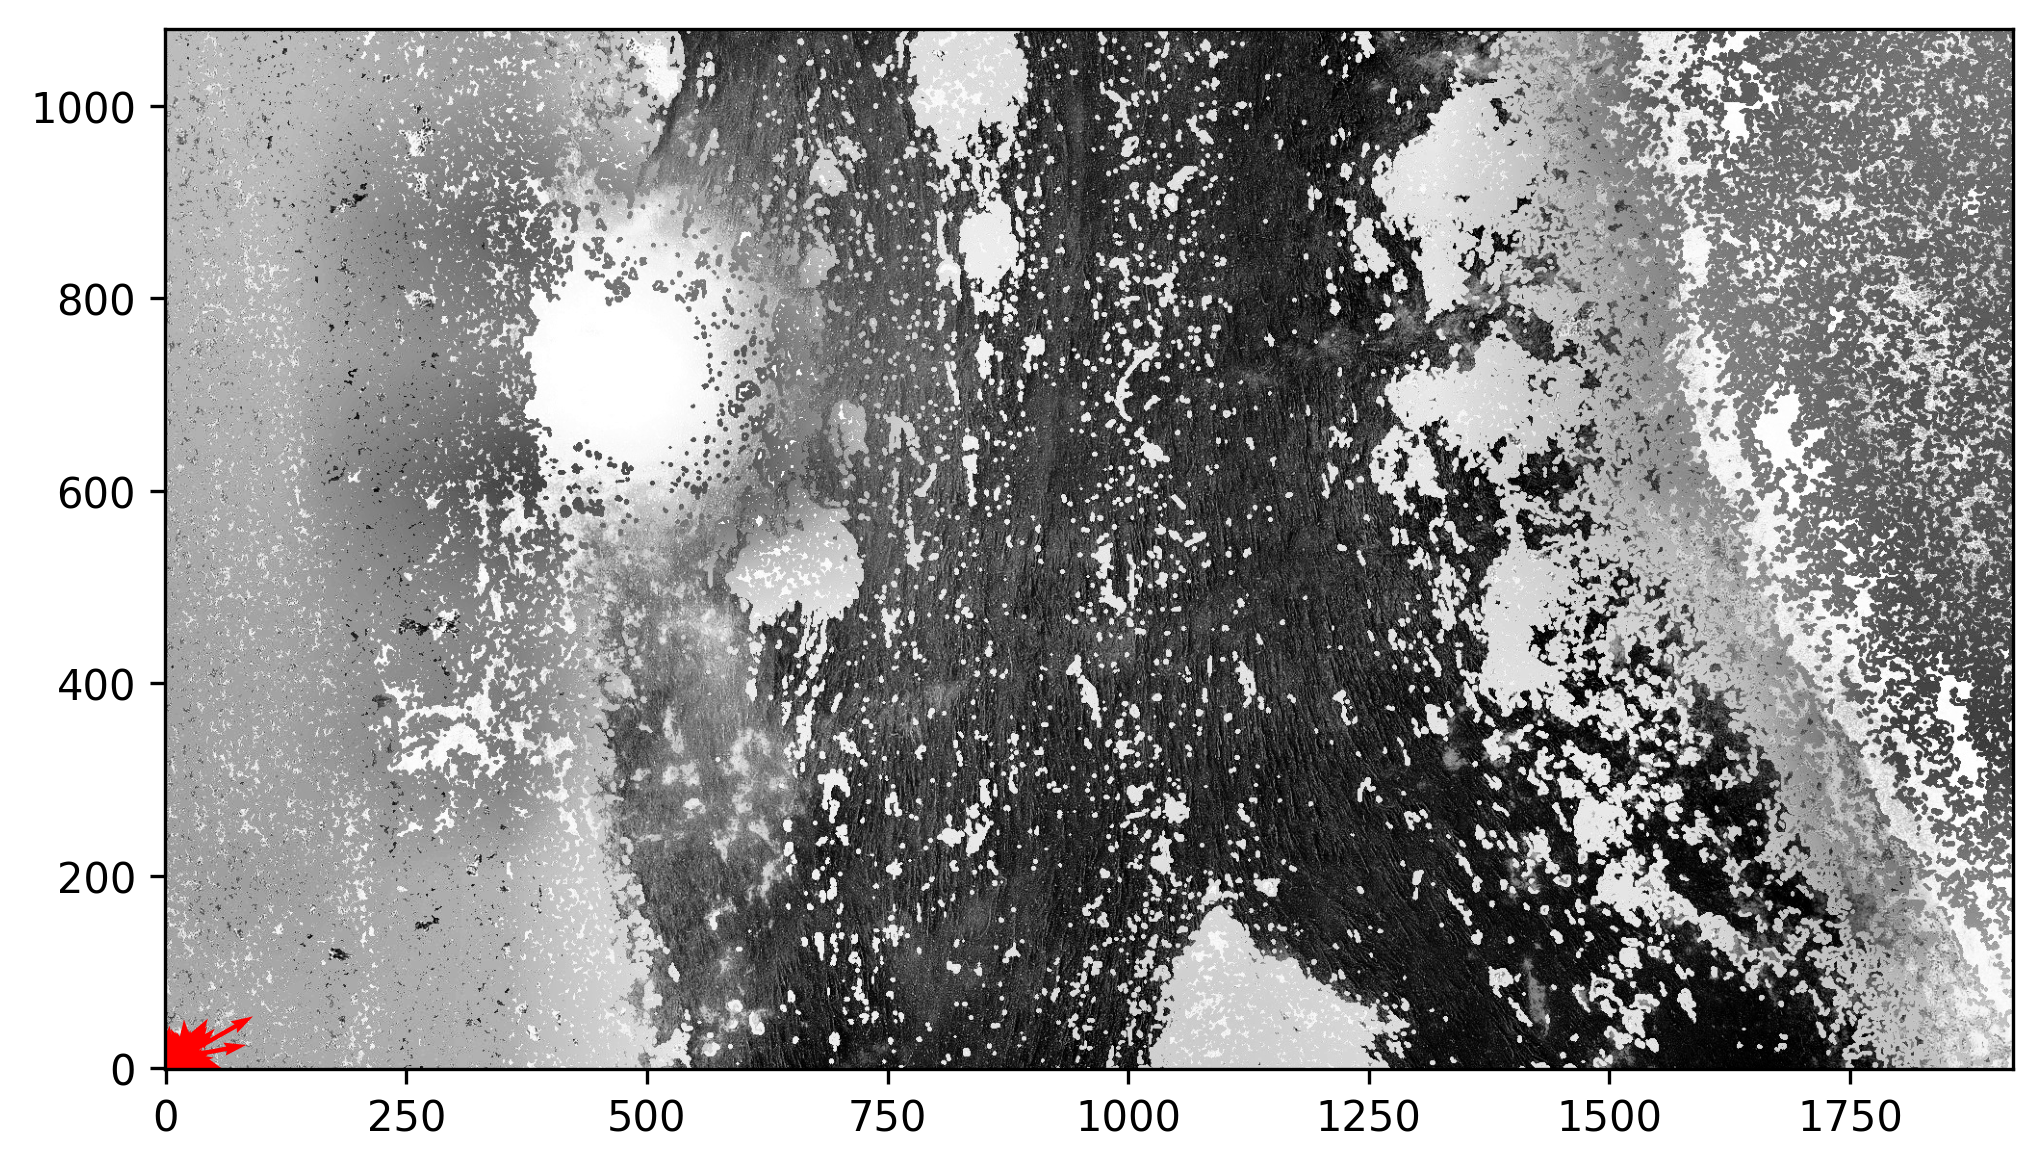

rij min: -1.0
rij max: 0.9918717741966248


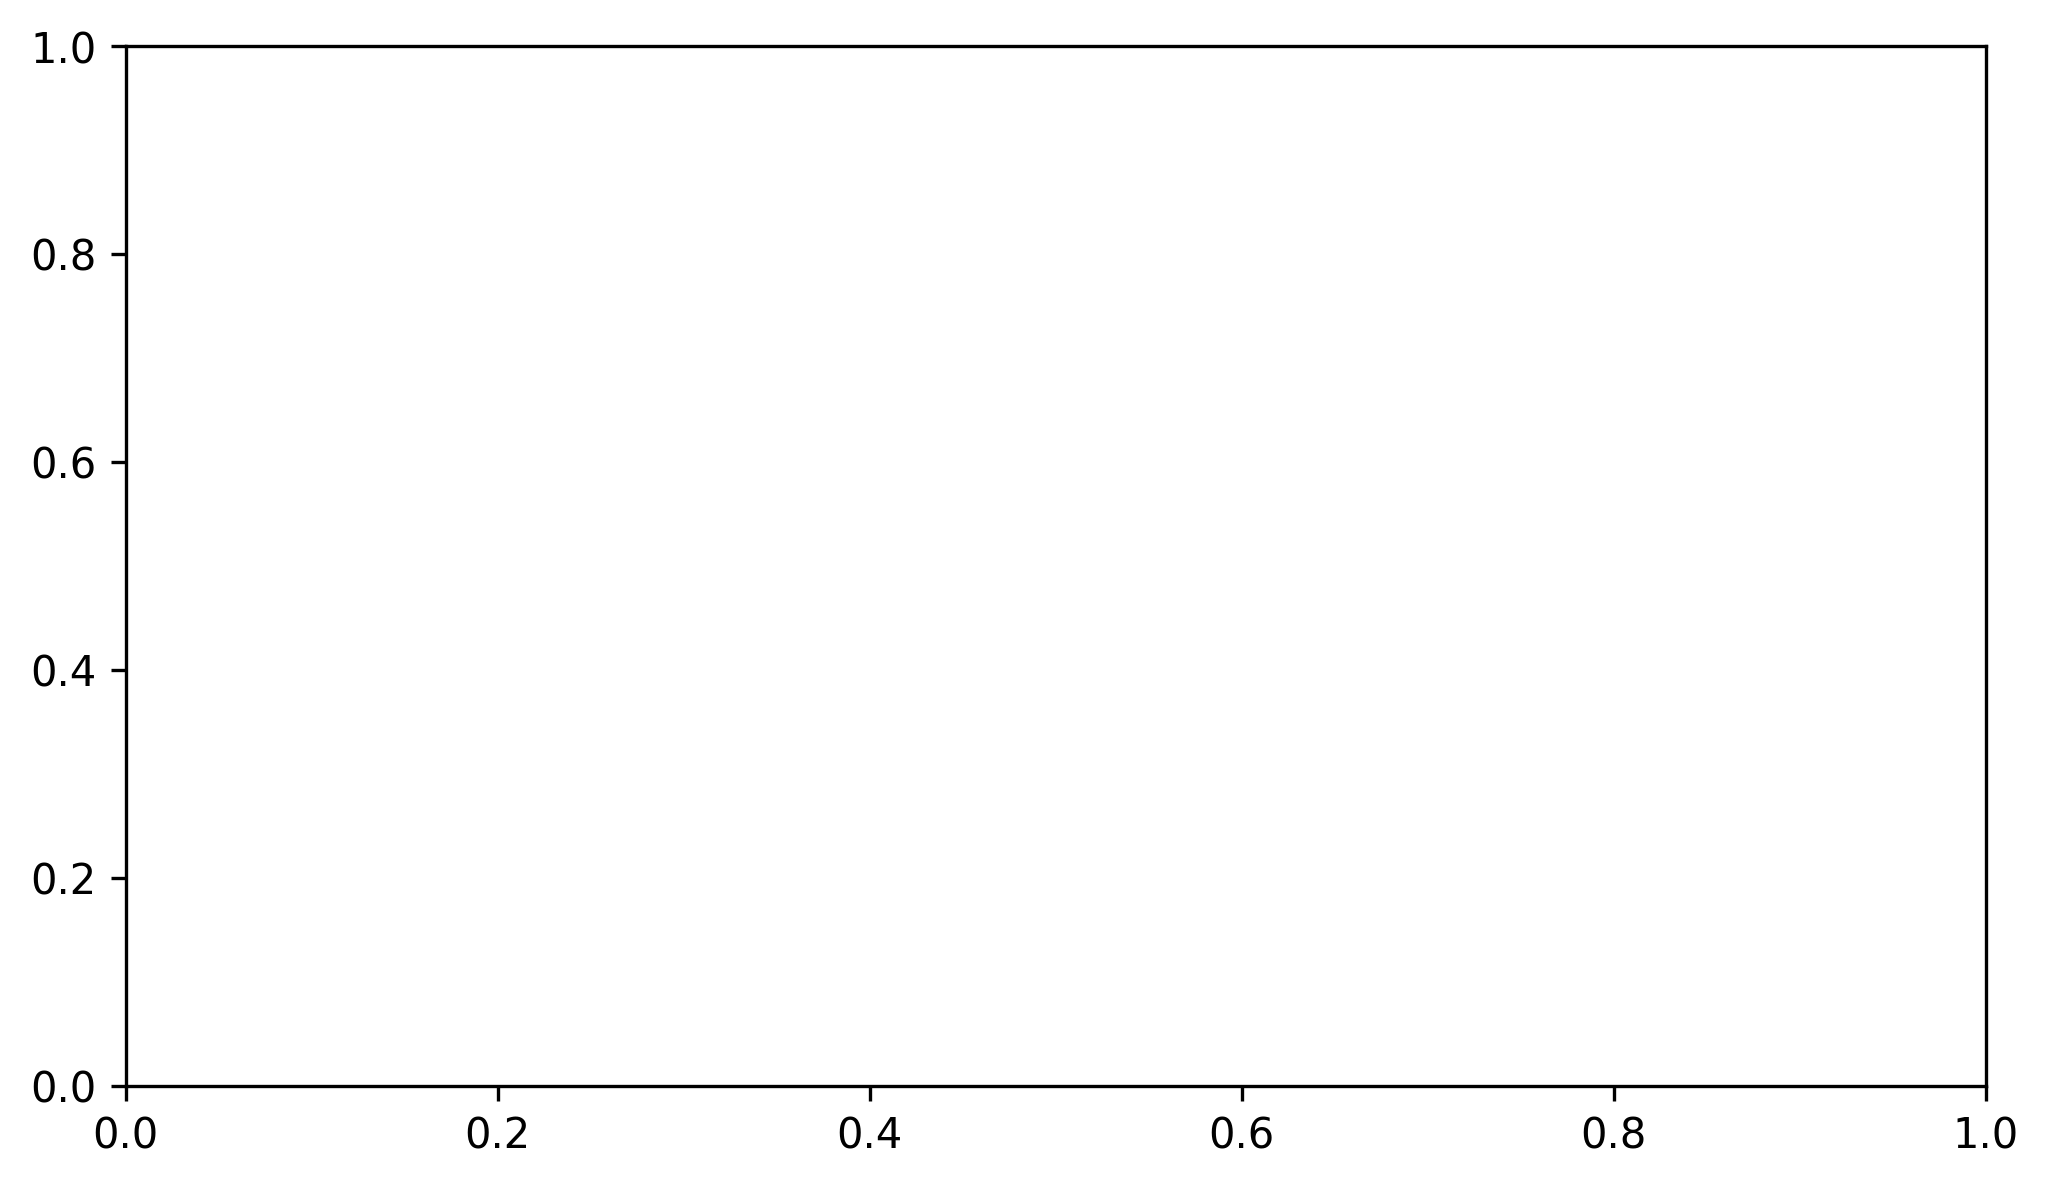

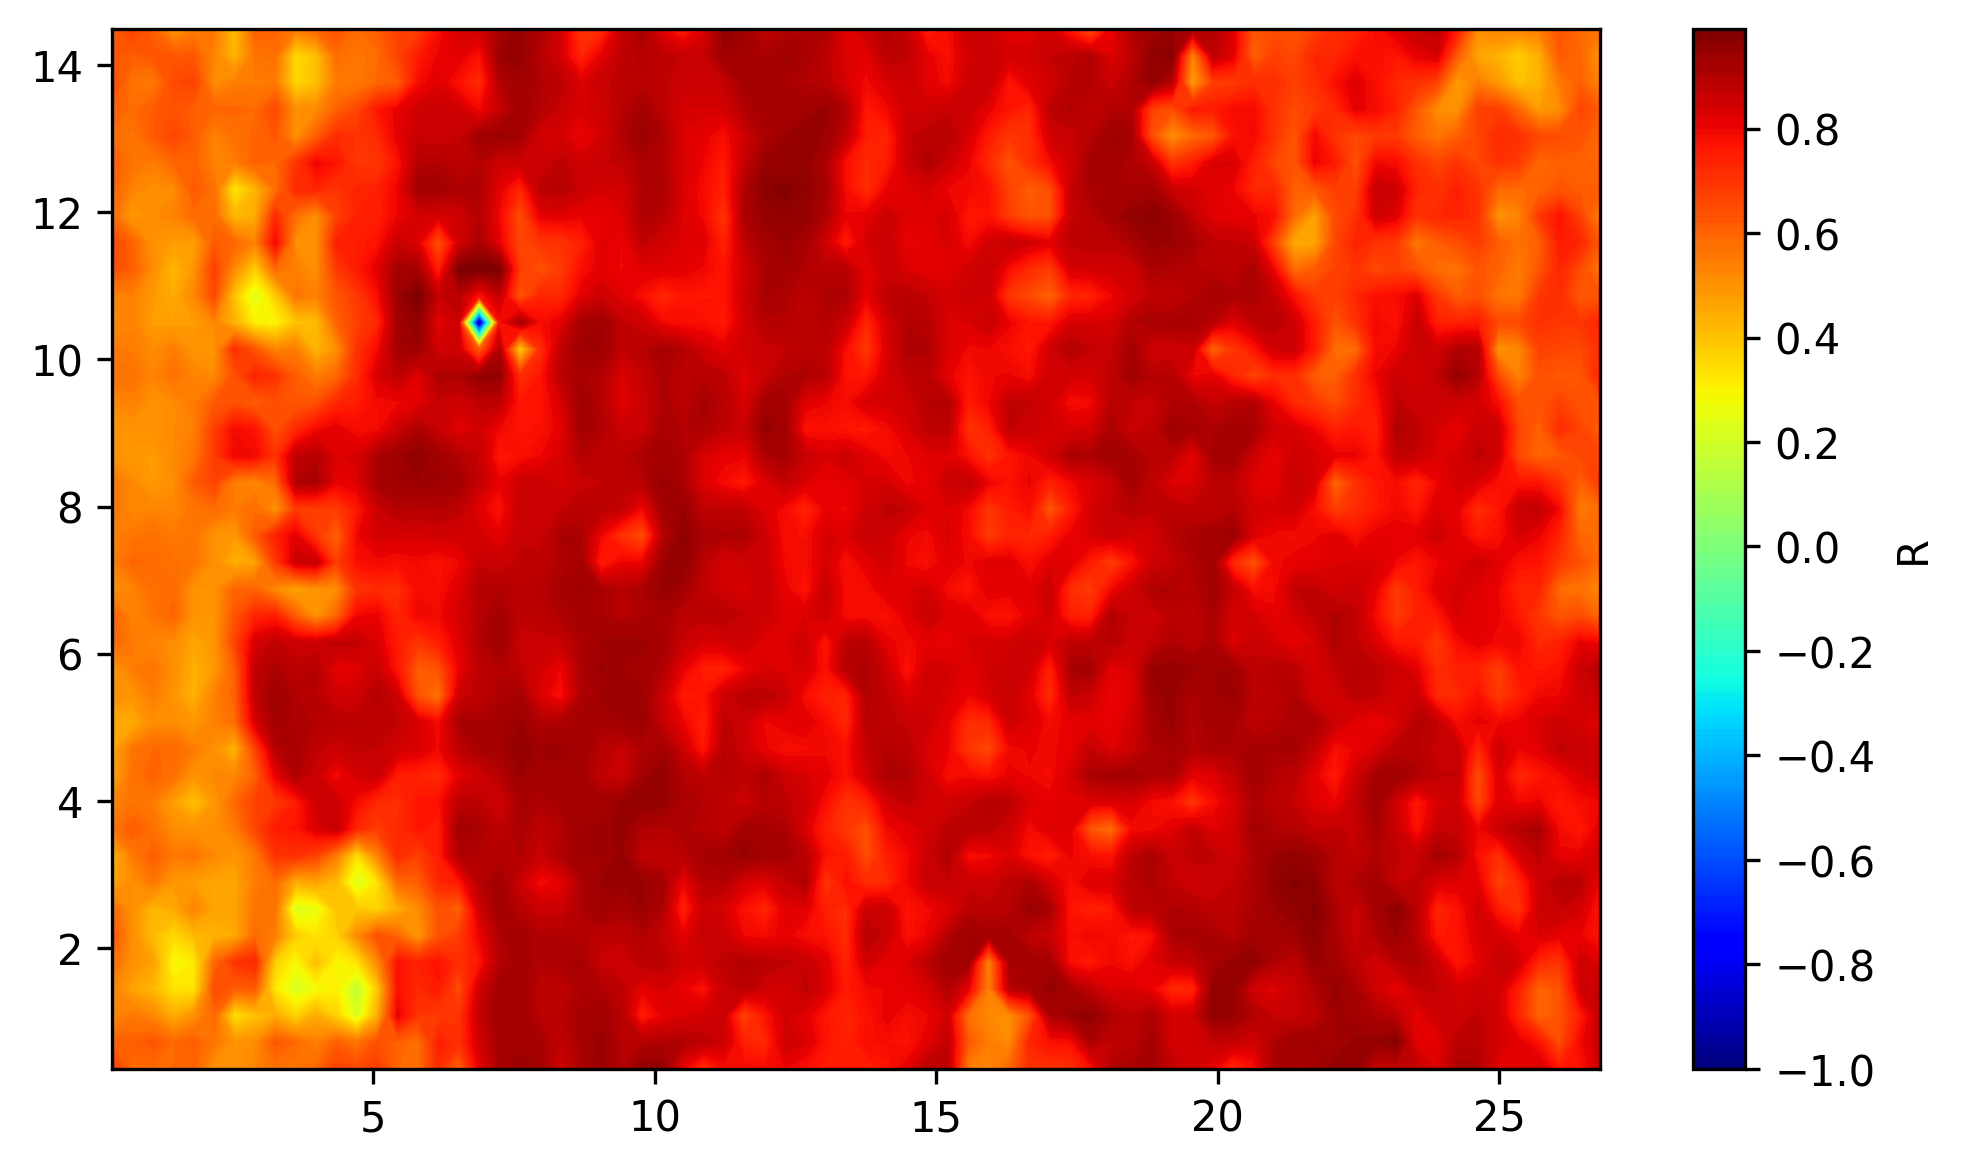

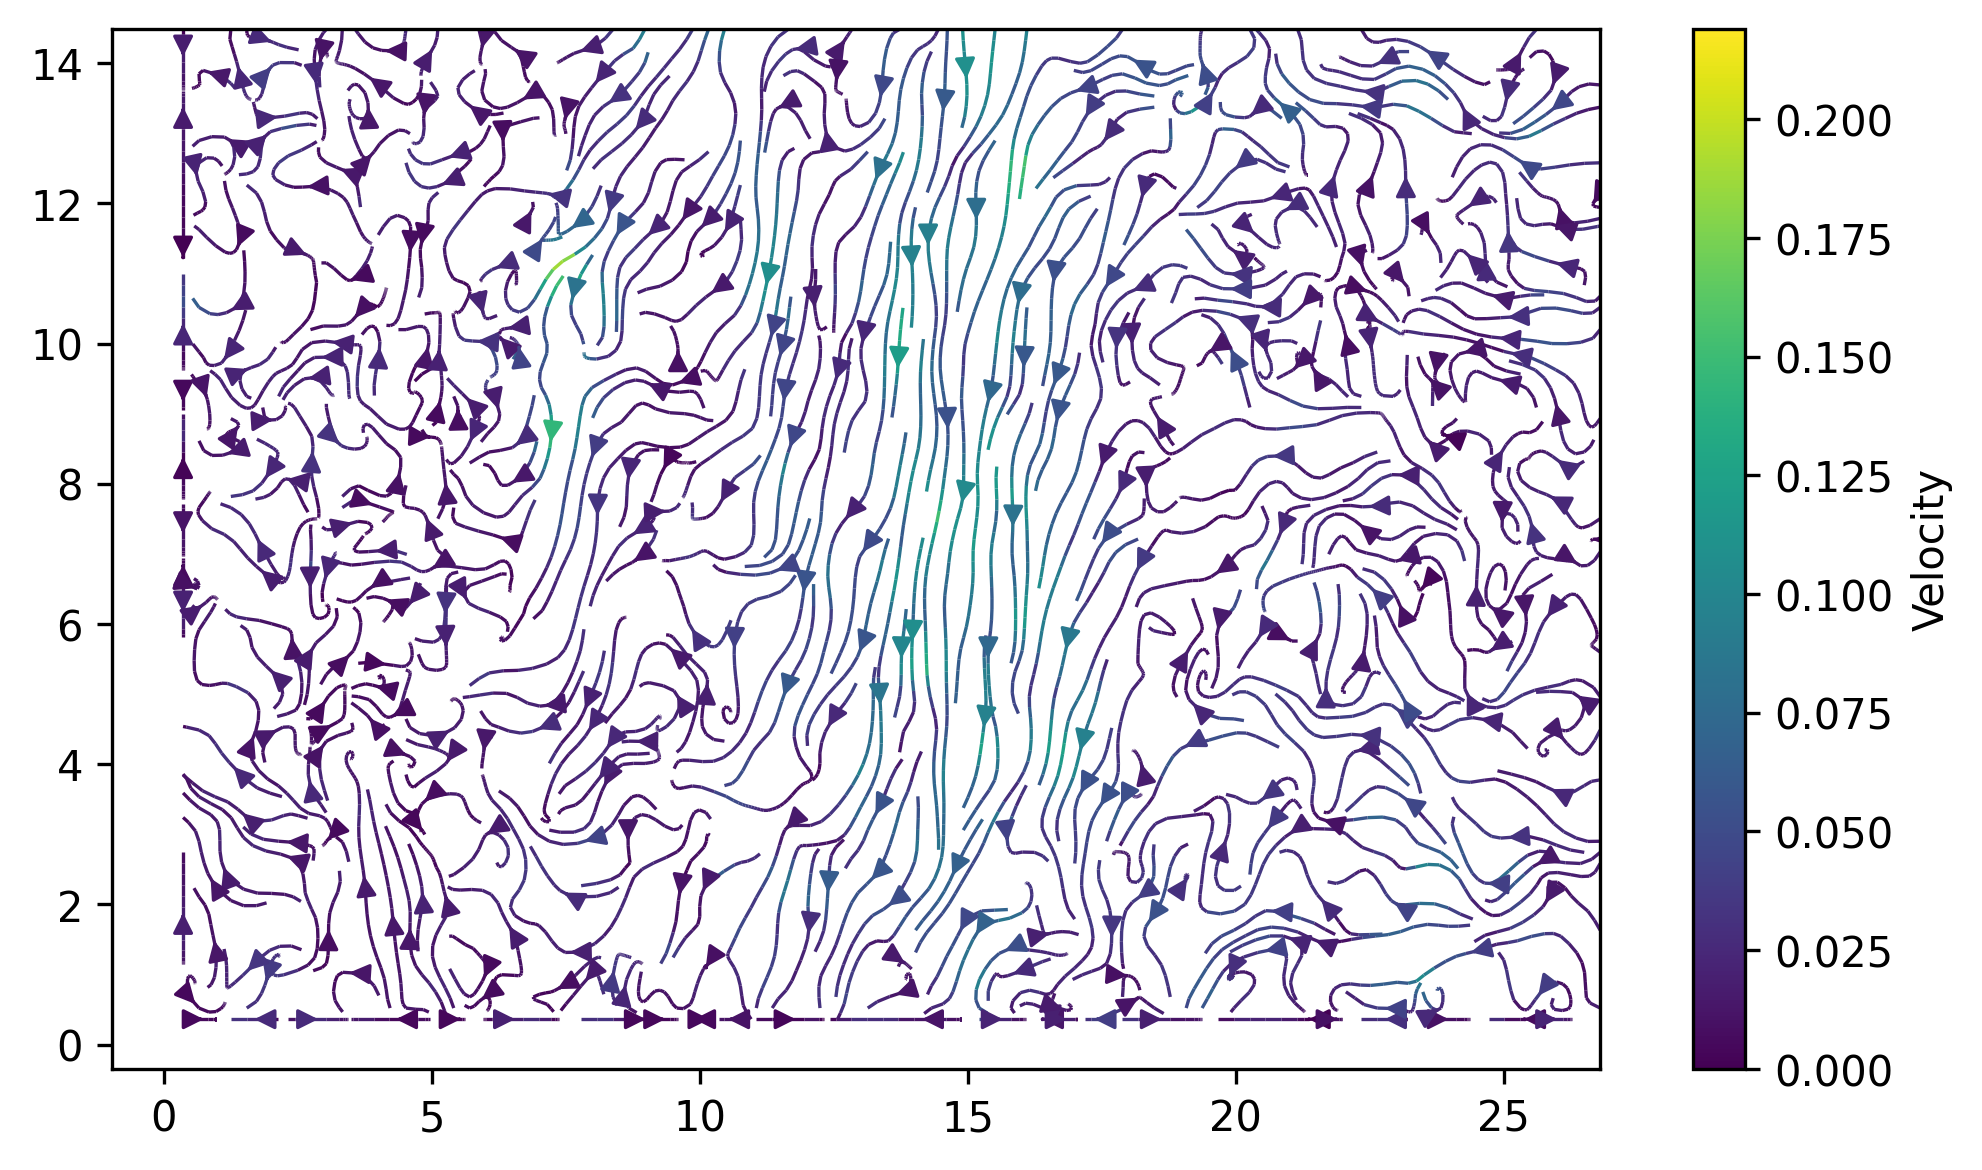

In [11]:
# -*- coding: utf-8 -*-
"""
Project: Particle Image Velocimetry (PIV) code!
         Sample code to call the function!
@author: A. F. Forughi (Aug. 2020, Last update: Jun. 2021)
"""

# %% Libraries:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# from piv_lib import piv # Importing the PIV function from piv_lib.py


# %% Loading the images:
img_1 = (np.flip(cv2.imread(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_first_frame1.jpg", 0),0)).astype('float32') # Read Grayscale
img_2 = (np.flip(cv2.imread(r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_second_frame2.jpg", 0),0)).astype('float32')


# %% Setting the PIV parameters:
iw=51 # Interrodation Windows Sizes (pixel)
sw=81 # Search Windows Sizes (sw > iw) (pixel)

r_limit=0.5   # minimum acceptable correlation coefficient. If you're not sure start with 0.6

i_fix=500     # Number of maximum correction cycles ; 0 means no correction

l_scale=0.0142   # spatial scale [m/pixel] ; 1 means no size scaling
t_scale= 0.0333  # time step = 1/frame_rate [s/frame] ; 1 means no time scaling

cores=-1 # Number of parallel processes: 1 = no parallel processing ; 2 and above = number of parallel processes ; -1 = maximum

# %% Runing PIV function:
""" *** Here are the function's arguments and returned values ***

Arguments:
    first image as a Numpy matrix (img_1)
    second image as a Numpy matrix (img_2)
    size of the introgation window (IW)
    Size of the search window (SW)
    Minimum acceptable correlation coefficient (r_limit)
    Number of maximum correction cycles (i_fix)
    Spatial scale [m/pixel]
    Time step = 1/frame_rate [s/frame]
    cores = Number of parallel processes

Returned values:
    X Position of the vectors (X)
    Y Position of the vectors (Y)
    X-velocity components (vecx)
    Y-velocity components (vecy)
    Velocity vector size (vec)
    Correlation coefficient of each intoregation window (rij)
"""

X, Y, vecx, vecy, vec, rij = piv(img_1,img_2,iw,sw,r_limit,i_fix,l_scale,t_scale,cores)


# %% Exporting Data in as a Numpy file:
np.savez('results.npz', X=X, Y=Y, vecx=vecx, vecy=vecy, vec=vec, rij=rij)

res=np.load('results.npz'); X=res['X']; Y=res['Y']; vecx=res['vecx']; vecy=res['vecy']; vec=res['vec']; rij=res['rij']; # Load saved data


# %% Generating graphs:

ia,ja = img_1.shape
fig, ax = plt.subplots(figsize=(8,8*ia/ja), dpi=300)
plt.imshow(img_1, cmap='gray', vmin=0, vmax=255,origin='lower')     # Comment to not superimpose on image
q = ax.quiver(X, Y, vecx, vecy,units='width',color="red")
plt.show()

# Printing the minimum and maximum values of rij
print("rij min:", rij.min())
print("rij max:", rij.max())

# Adjust the step size in np.arange to generate more levels within the range of rij
step_size = 0.01  # You can try adjusting this value if necessary

# Adjust the function call with updated levels
fig, ax = plt.subplots(figsize=(8,8*ia/ja), dpi=300)
levels = np.arange(rij.min(), 0.3, step_size)

# Check the length of the levels array
if len(levels) < 2:
    print("Warning: Adjusting step size to increase number of levels")
    step_size = 0.001
    levels = np.arange(rij.min(), min(rij.max() + 0.1, 1.0), step_size)
fig, ax = plt.subplots(figsize=(8,8*ia/ja), dpi=300)
plt.contourf(X[0],np.transpose(Y)[0],rij,cmap='jet',levels=np.arange(rij.min(),min(rij.max()+0.1,1.0),0.01))
plt.colorbar(label='R')
plt.show()

fig, ax = plt.subplots(figsize=(8,8*ia/ja), dpi=300)
plt.streamplot(X, Y, vecx, vecy,density=3,linewidth=0.8,color=vec)
plt.colorbar(label='Velocity')
plt.show()

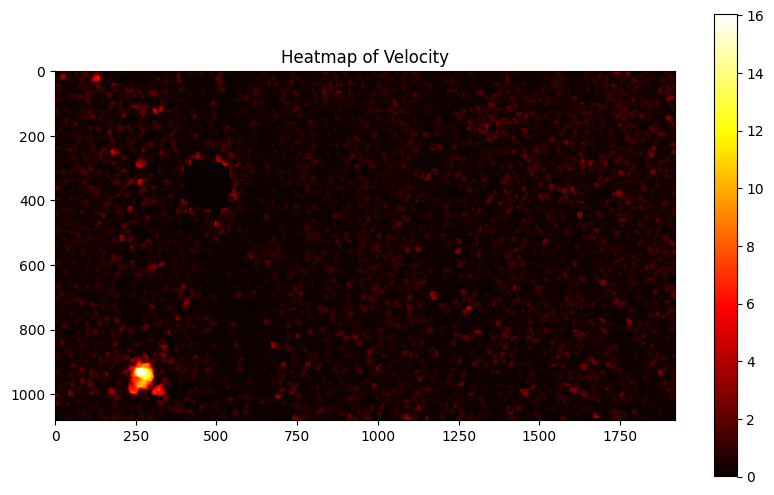

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive

# # Mount Google Drive
# # drive.mount('/content/drive')

# File paths for the two frames
frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_first_frame1.jpg"
frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_second_frame2.jpg"

# Read the frames from the file paths
frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

# Check if frames were read correctly
if frame1 is None or frame2 is None:
    print("Error loading frames.")
    exit()

# Convert frames to grayscale
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Calculate optical flow using Farneback's method
flow = cv2.calcOpticalFlowFarneback(frame1_gray, frame2_gray, None,
                                    pyr_scale=0.5, levels=3, winsize=15,
                                    iterations=3, poly_n=5, poly_sigma=1.2, flags=0)

# Calculate the magnitude and angle of the flow
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Create a heatmap using the magnitude of the flow
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Velocity")
heatmap = plt.imshow(magnitude, cmap='hot')
plt.colorbar(heatmap)
plt.show()
# Normalize the magnitude for visualization
# normalized_magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
# plt.imshow(normalized_magnitude, cmap='hot')



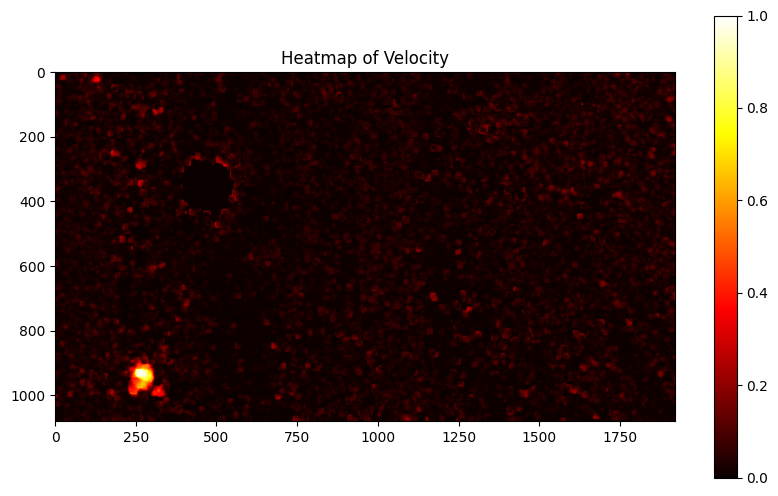

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# File paths for the two frames
frame1_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_first_frame1.jpg"
frame2_path = r"C:\Users\goura\OneDrive\Desktop\MAT\Processed\processed_second_frame2.jpg"

# Read the frames from the file paths
frame1 = cv2.imread(frame1_path)
frame2 = cv2.imread(frame2_path)

# Check if frames were read correctly
if frame1 is None or frame2 is None:
    print("Error loading frames.")
    exit()

# Convert frames to grayscale
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

# Calculate optical flow using Farneback's method
flow = cv2.calcOpticalFlowFarneback(frame1_gray, frame2_gray, None,
                                    pyr_scale=0.5, levels=3, winsize=15,
                                    iterations=3, poly_n=5, poly_sigma=1.2, flags=0)

# Calculate the magnitude and angle of the flow
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Normalize the magnitude values to range from 0 to 1
normalized_magnitude = cv2.normalize(magnitude, None, 0, 1, cv2.NORM_MINMAX)

# Create a heatmap using the normalized magnitude of the flow
plt.figure(figsize=(10, 6))
plt.title("Heatmap of Velocity")
heatmap = plt.imshow(normalized_magnitude, cmap='hot')
plt.colorbar(heatmap)
plt.show()
